In [97]:
#Importing libreries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [98]:
df = pd.DataFrame(pd.read_csv("Dataset\encoded_dataset.csv")) 

In [99]:
# Label encode the 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [100]:
print(df.head())

        ID  Gender  PHI  MHI  FI  LD  SCI  UE  TI  APM
0  1711182       1    1    0   1   1    0   1   0    5
1  2312321       0    0    0   1   1    1   1   0    4
2  1510645       0    1    1   0   0    1   0   1    1
3  2311271       1    1    0   1   0    1   1   1    5
4  2211591       1    1    1   0   0    1   0   0    3


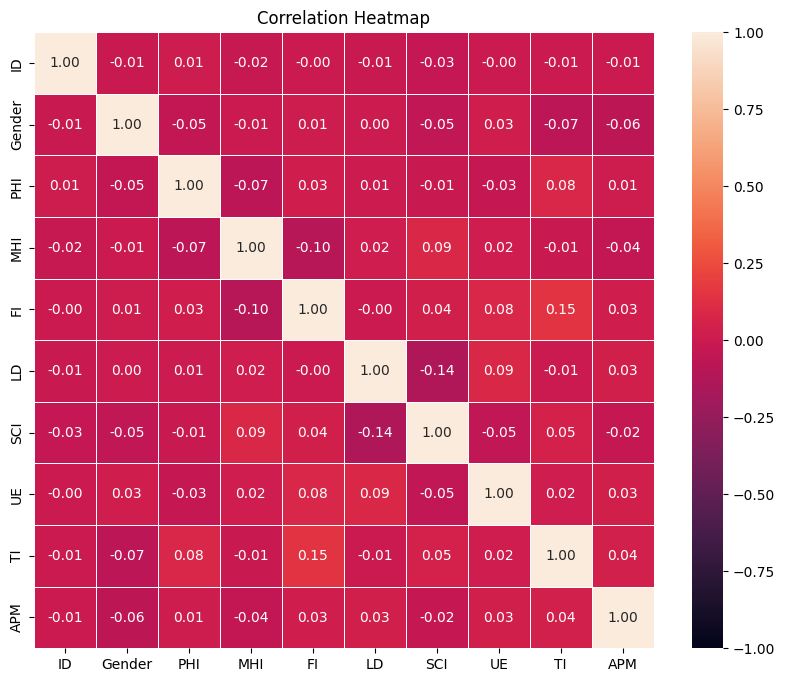

In [101]:
# Correlation matrix
correlation_matrix = df.corr()

# Drop the 'ID' column
df = df.drop('ID', axis=1)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the dataset into features (X) and target variable (y)
X = df[['PHI', 'MHI', 'FI', 'LD', 'SCI', 'UE', 'TI']]
y = df['APM']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.36      0.31        94
           2       0.23      0.27      0.25        70
           3       0.37      0.44      0.40       124
           4       0.27      0.32      0.29       112
           5       0.31      0.06      0.09        72
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2

    accuracy                           0.30       500
   macro avg       0.13      0.13      0.12       500
weighted avg       0.28      0.30      0.27       500



c:\Users\aquat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aquat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aquat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:134